In [28]:
import numpy as np

In [29]:
K = [1,2]#стани

#можливі значеня мат. спод.
A1 = [0,1]#при к1
A2 = [2,3]#при к2

p_k1 = 1/3 #ймовірність  к1
p_k2 = 2/3 #ймовірність  к2

#реальні значення мат. спод. 
a1_real = 0
a2_real = 3

In [87]:
n = 100

# Генеруємо випадкові величини з мішаного нормального розподілу
X = np.random.choice([a1_real, a2_real], size=n, p=[p_k1, p_k2]) + np.random.normal(loc=0.0, scale=1.0, size=n)

C:\Users\Sofi\opencv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


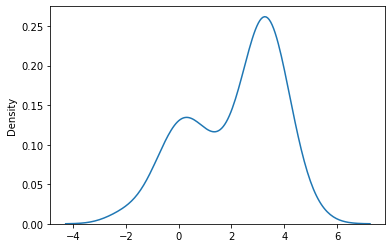

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(X, hist=False)

plt.show()

In [89]:
#Стартові значення

p1 = 0.5
p2 = 0.5

a1 = 1
a2 = 2

In [90]:
import math

def f(x,a):
    return ((math.exp(-(((x-a)**2)/2)))/np.sqrt(2*math.pi))

In [91]:
def At(A, ati):
    res = [sum([ati[i]*np.log(f(X[i],a)) for i in range(len(X))]) for a in A]
    print(res)
    return A[np.argmax(res)]

In [94]:
#Алгоритм самонавчання

def self_learning(a1,a2,p1,p2):
    at1 = [(p1*f(X[i],a1))/(p1*f(X[i],a1)+p2*f(X[i],a2)) for i in range(len(X))]                   
    at2 = [(p2*f(X[i],a2))/(p1*f(X[i],a1)+p2*f(X[i],a2)) for i in range(len(X))]  

    p1_1 = sum(at1)/len(X)
    p2_1 = sum(at2)/len(X)

    a1_1 = At([0,1], at1) #a={0,1}
    a2_1 = At([2,3], at2) #a={2,3}
    
    print("a1: ",a1, "a1_1: ",a1_1,"\na2: ",a2, "a2_1: ",a2_1, "\np1: ", p1, "p1_1: ", p1_1, "\nabs(p1_1-p1): ",abs(p1_1-p1), "\np2: ", p2, "p2_1: ", p2_1,"\nabs(p2_1-p2)",abs(p2_1-p2))

    if a1_1==a1 and a2_1==a2 and abs(p1_1-p1)<0.001 and abs(p2_1-p2)<0.001:
        print("Stop algorithm")
        return 
    else:
        print("continue")
        a1 = a1_1
        a2 = a2_1
        p1 = p1_1
        p2 = p2_1
        self_learning(a1,a2,p1,p2)

In [95]:
self_learning(a1,a2,p1,p2)

[-92.77066948105035, -82.47323882990847]
[-127.32753074730718, -98.71366187870639]
a1:  1 a1_1:  1 
a2:  2 a2_1:  3 
p1:  0.5 p1_1:  0.3852840880561178 
abs(p1_1-p1):  0.1147159119438822 
p2:  0.5 p2_1:  0.614715911943882 
abs(p2_1-p2) 0.11471591194388198
continue
[-67.90299266527468, -71.87902878530062]
[-123.12091718108297, -79.1788678619859]
a1:  1 a1_1:  0 
a2:  3 a2_1:  3 
p1:  0.3852840880561178 p1_1:  0.39055765645275925 
abs(p1_1-p1):  0.005273568396641448 
p2:  0.614715911943882 p2_1:  0.6094423435472407 
abs(p2_1-p2) 0.005273568396641282
continue
[-45.17155459060338, -59.940437790861736]
[-129.94449212464642, -86.5652577840311]
a1:  0 a1_1:  0 
a2:  3 a2_1:  3 
p1:  0.39055765645275925 p1_1:  0.3337793461591889 
abs(p1_1-p1):  0.05677831029357033 
p2:  0.6094423435472407 p2_1:  0.6662206538408111 
abs(p2_1-p2) 0.05677831029357039
continue
[-43.33661859627918, -58.83248638784899]
[-131.237808483886, -88.95628864703545]
a1:  0 a1_1:  0 
a2:  3 a2_1:  3 
p1:  0.3337793461591889 